In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import xfirst.data.conex as conex
import xfirst.profile_functions as profile_functions

Welcome to JupyROOT 6.28/04


### Settings

In [2]:
conex_files = 'data/conex/p_17-20eV_60deg/sibyll23d/*.root'
branches = ['Xdep', 'Edep']
nfits = 40000
nrows_plt = 3
ncols_plt = 4

fcn = profile_functions.usp()

### Read some profiles, fit them, then draw

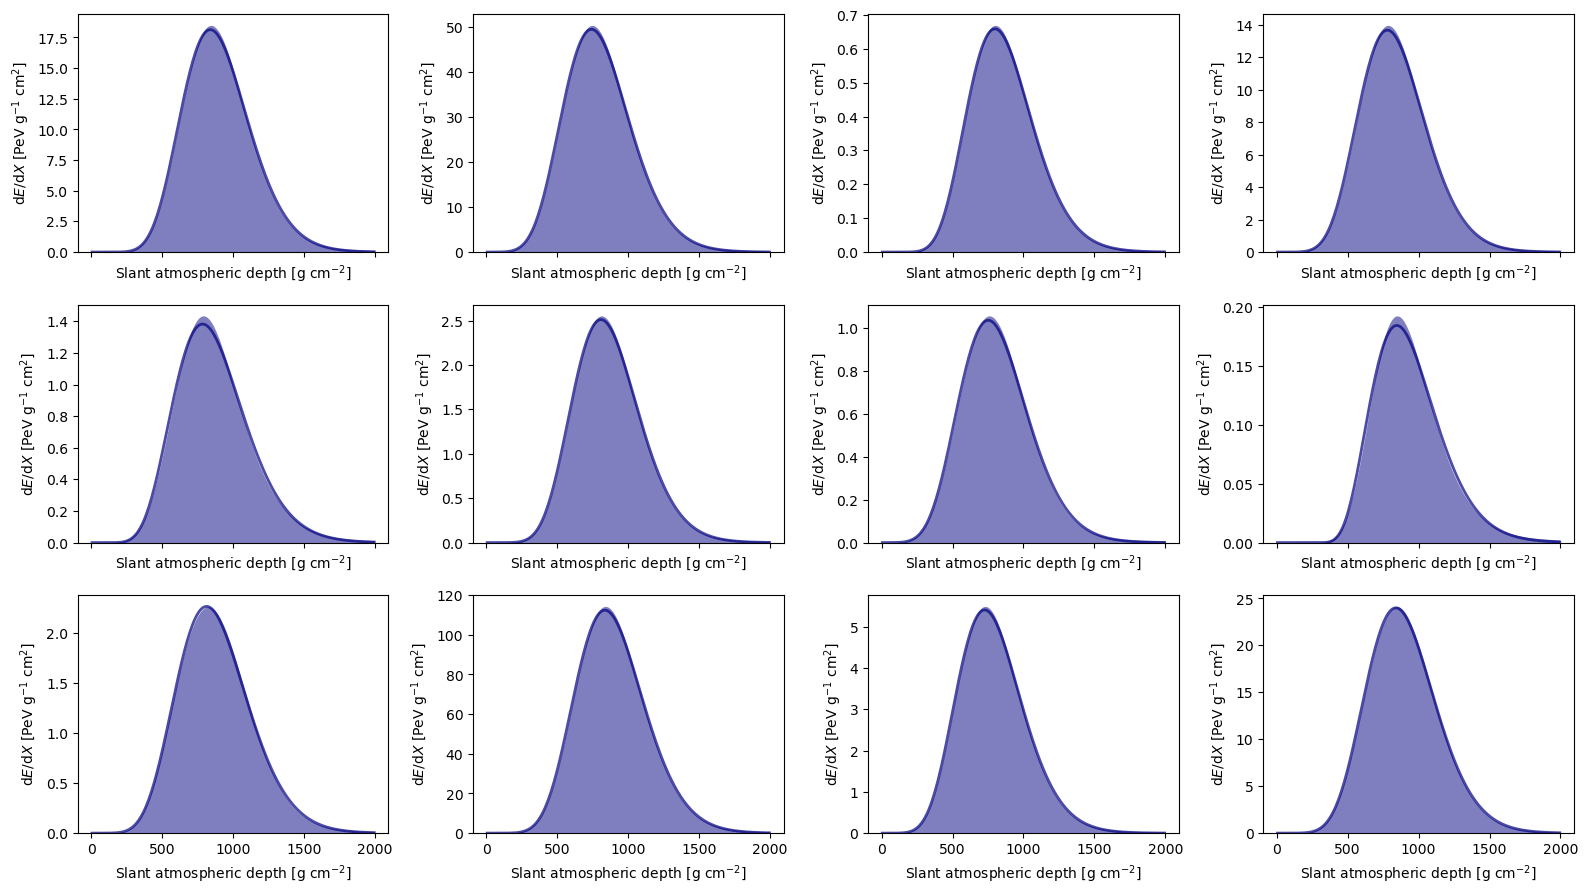

In [3]:
fig, axes = plt.subplots(nrows_plt, ncols_plt, sharex = 'all', sharey = False, figsize = (16, 9))
parser = conex.parser(conex_files, branches, nshowers = nrows_plt*ncols_plt, concat = False)

for (x, y), ax in zip(parser, axes.flatten()):
  fcn.fit(x, y, concat = False)
  fcn.draw(axis = ax)

fig.tight_layout()

### Fit showers and put into a table

In [5]:
parser = conex.parser(conex_files, branches, nfits)
fits = fcn.get_fits(parser)
fits

,lgNmax,Xmax,L,R,e_lgNmax,e_Xmax,e_L,e_R,status,chi2,ndf
0,16.713449,838.887015,235.190425,0.264638,0.004542,1.398955,0.634623,0.005031,1.0,0.026002,196.0
1,17.718890,740.304588,235.520473,0.262065,0.004850,1.499637,0.676677,0.005367,1.0,0.029713,196.0
2,13.398414,798.597613,228.261198,0.285932,0.004205,1.240835,0.567233,0.004524,1.0,0.022386,196.0
3,16.429892,779.688265,232.823967,0.250726,0.005047,1.501168,0.696669,0.005348,1.0,0.032111,196.0
4,14.139461,784.245061,247.619702,0.329366,0.005124,1.665134,0.763938,0.005892,1.0,0.032645,196.0
...,...,...,...,...,...,...,...,...,...,...,...
39995,12.580822,610.652646,220.183832,0.330064,0.007041,2.041411,0.924758,0.008026,1.0,0.061842,196.0
39996,15.418113,751.483149,231.451369,0.252474,0.003939,1.124350,0.532787,0.003799,1.0,0.019839,196.0
39997,15.727413,758.059142,227.325445,0.256695,0.005196,1.544146,0.700281,0.005724,1.0,0.034034,196.0
39998,17.629643,834.888791,232.629367,0.242254,0.003715,1.082794,0.508083,0.003728,1.0,0.017569,196.0


### Draw parameter distributions

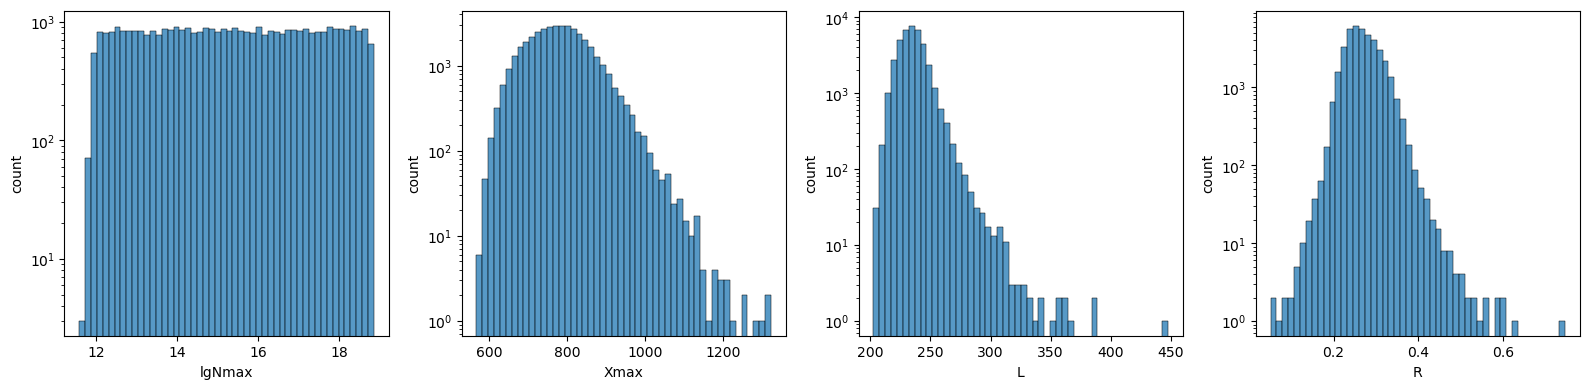

In [6]:
fig, axes = plt.subplots(1, fcn.npar, sharex = False, sharey = False, figsize = (16, 4))

mask = fits.loc[:, 'status'] > 0.99
good_fits = fits.loc[mask]

for param, ax in zip(fcn.parameter_names, axes.flatten()):
  sns.histplot(good_fits, x = param, bins = 50, ax = ax, log = True)
  ax.set_xlabel(param)
  ax.set_ylabel('count')

fig.tight_layout()